In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")
query_1 = "SELECT * FROM sqlite_master WHERE type = 'table';"

#sqlite master listed out all tables within database that is open. 
https://stackoverflow.com/questions/82875/how-to-list-the-tables-in-a-sqlite-database-file-that-was-opened-with-attach
The query 1 could be used for screening all elements in the databse

In [2]:
conn.cursor().execute(query_1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [3]:
query_2 = "SELECT * FROM facts Limit 5;"
pd.read_sql_query(query_2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


once targe tables has been found, can use pandas_read command to read the data into table

In [4]:
query_3_minpop = "SELECT MIN(population) FROM facts;"
query_4_maxpop = "SELECT MAX(population) FROM facts;"
query_5_minpopgrt = "SELECT MIN(population_growth) FROM facts;"
query_6_maxpopgrt = "SELECT MAX(population_growth) FROM facts;"

In [5]:
pd.read_sql_query(query_3_minpop, conn)

,MIN(population)
0,0


In [6]:
pd.read_sql_query(query_4_maxpop, conn)

,MAX(population)
0,7256490011


In [7]:
pd.read_sql_query(query_5_minpopgrt, conn)

,MIN(population_growth)
0,0.0


In [8]:
pd.read_sql_query(query_6_maxpopgrt, conn)

,MAX(population_growth)
0,4.02


In [9]:
query_7 = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(query_7, conn)

,name
0,Antarctica


In [10]:
query_8 = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(query_8, conn)

,name
0,World


region Antarctica and world are not country, should be removed from the analysis/table

In [16]:
query_9 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != 0 AND population != (SELECT MAX(population) FROM facts);"

In [18]:
dataframe_1 = pd.read_sql_query(query_9, conn)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81c96b6c50>,
      dtype=object)

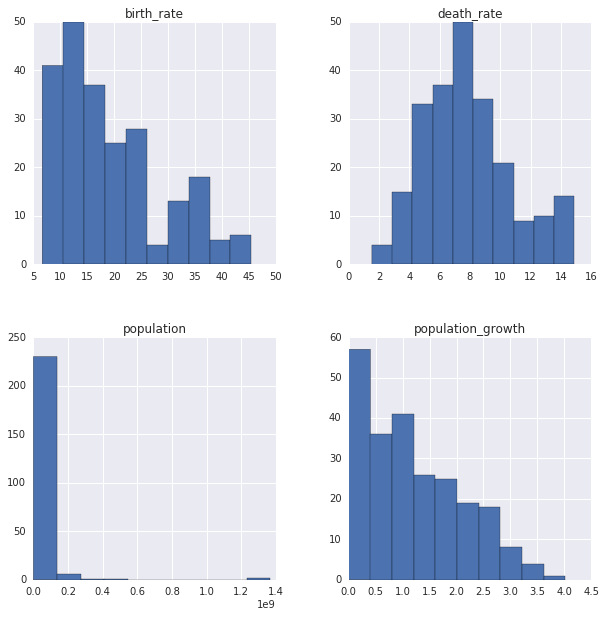

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

dataframe_1.hist(ax=ax)

note that the hist() allows to pass a dataframe rather than a column into the function, it will generate a histagram for each of columns
findings:
chart 1 - birth_rate focus betwee 5% - 15%
chart 2 - death_rate between 6% -10%
chart 3 - population of mojority of countries falls under 0.2 billions
chart 4 - population growth slows and skewed to lower 1% rate

In [37]:
query_10 = "SELECT name, cast(population as float)/cast(area as float) AS pop_density FROM facts ORDER BY pop_density DESC;"

In [38]:
pd.read_sql_query(query_10, conn)

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


macau has highest population density

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81c845c940>]],
      dtype=object)

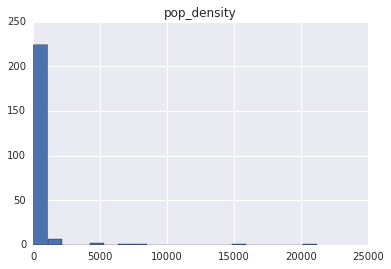

In [44]:
pd.read_sql_query(query_10, conn).hist(bins=20)

In [45]:
query_11 = "SELECT name, cast(area_water as float)/cast(area_land as float) as wat_lnd FROM facts ORDER BY wat_lnd DESC;"

In [46]:
pd.read_sql_query(query_11, conn)

,name,wat_lnd
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [ ]:
query_11 = "SELECT name, cast(area_water as float)/cast(area_land as float) as wat_lnd FROM facts ORDER BY wat_lnd DESC;"